##sample

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이프라인 구성
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD()),
    ('logreg', LogisticRegression())
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'svd__n_components': [2, 5, 10],
    'logreg__C':[0.1,1.0,10.0]
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

def evaluate_model(model, X_test, y_test):
    # 예측 수행
    y_pred = model.predict(X_test)
    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)
    # 분류 보고서 생성
    report = classification_report(y_test, y_pred)
    # ROC AUC 계산
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # 결과 출력
    print(f'Test Accuracy: {accuracy:.4f}')
    print("\nClassification Report:")
    print(report)
    print(f'Test ROC AUC: {roc_auc:.4f}')

# 최적의 모델을 사용하여 테스트 데이터 평가
evaluate_model(grid_search, X_test, y_test)

Best parameters found:  {'logreg__C': 1.0, 'svd__n_components': 10}
Test Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Test ROC AUC: 0.9977


California_housing 데이터셋으로 아래사항을 참조하여 주택가격을 예측하는 회귀모델을 개발하세요.
- 전체 회귀모델을 적용
- 각 모델별 최적 하이퍼파라미터 - GridSearchCV 활용
- 평가지수 MSE 기준으로 가장 성능이 좋은 모델과 파라미터를 적용하여 평가 결과를 출력

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()
df['target'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
data.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

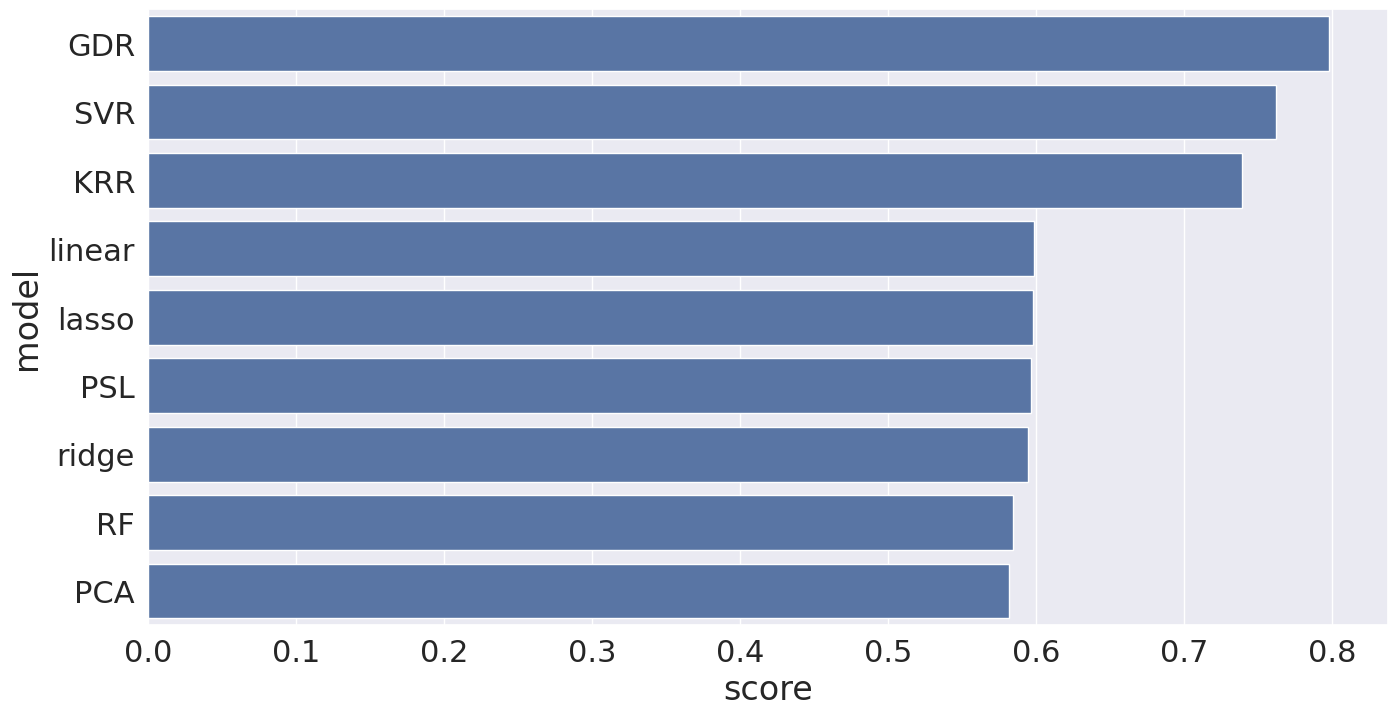

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


def every_pipe():
    # pipe 생성
    pipe_linear = Pipeline([
                    ('scl', StandardScaler()),
                    ('poly', PolynomialFeatures()),
                    ('fit', LinearRegression())])
    pipe_lasso = Pipeline([
                    ('scl', StandardScaler()),
                    ('poly', PolynomialFeatures()),
                    ('fit', Lasso(random_state = 42))])
    pipe_ridge = Pipeline([
                    ('scl', StandardScaler()),
                    ('poly', PolynomialFeatures()),
                    ('fit', Ridge(random_state = 42))])
    pipe_pca = Pipeline([
                    ('scl', StandardScaler()),
                    ('pca', PCA()),
                    ('fit', Ridge(random_state = 42))])
    pipe_pls = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', PLS())])
    pipe_gbr = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', GBR())])
    pipe_rfr = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', RFR())])
    pipe_svr = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', SVR())])
    pipe_KR = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', KernelRidge())])
    pipe = [pipe_linear, pipe_lasso, pipe_pca, pipe_ridge, pipe_pls, pipe_gbr, pipe_rfr, pipe_svr, pipe_KR]
    return pipe

def every_param():
    grid_params_linear = [{
        "poly__degree" : np.arange(1,3),
        "fit__fit_intercept" : [True, False],
    }]
    grid_params_lasso = [{
        "poly__degree" : np.arange(1,3),
        "fit__tol" : np.logspace(-5,0,10) ,
        "fit__alpha" : np.logspace(-5,1,10) ,
                        }]
    grid_params_pca = [{
        "pca__n_components" : np.arange(2,8)
    }]
    grid_params_ridge = [{
        "poly__degree" : np.arange(1,3),
        "fit__alpha" : np.linspace(2,5,10) ,
        "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
        "fit__tol" : np.logspace(-5,0,10) ,
                        }]
    grid_params_pls = [{
        "fit__n_components" : np.arange(2,8)
    }]
    min_samples_split_range = [0.1, 0.5, 0.7 , 0.9]

    grid_params_gbr =[{
        "fit__max_features" : ["sqrt","log2"] ,
        "fit__loss" : ["ls","lad","huber","quantile"] ,
        "fit__max_depth" : [5,6,7,8] ,
        "fit__min_samples_split" : min_samples_split_range ,
    }]
    grid_params_rfr =[{
        "fit__max_features" : ["sqrt","log2"] ,
        "fit__max_depth" : [5,6,7,8] ,
        "fit__min_samples_split" : min_samples_split_range ,
    }]
    grid_params_svr =[{
        "fit__kernel" : ["rbf", "linear"] ,
        "fit__degree" : [2, 3, 5] ,
        "fit__gamma" : np.logspace(-5,1,10) ,
    }]
    grid_params_KR =[{
        "fit__kernel" : ["rbf","linear"] ,
        "fit__gamma" : np.logspace(-5,1,10) ,
    }]
    params = [grid_params_linear, grid_params_lasso, grid_params_pca, grid_params_ridge, grid_params_pls, grid_params_gbr, grid_params_rfr, grid_params_svr, grid_params_KR]
    return params




pipe = every_pipe()
params = every_param()
grid_dict = {
    0: 'linear',
    1: 'lasso',
    2: 'PCA' ,
    3: 'ridge' ,
    4: 'PSL',
    5: "GDR" ,
    6: "RF" ,
    7: "SVR" ,
    8: "KRR"
            }

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.4, random_state=0)

def main(pipe, params, grid_dict, X_train, X_test, y_train, y_test):
    model_mse = {}
    model_r2 = {}
    model_best_params = {}

    for idx , (param , model) in enumerate(zip(params , pipe)) :
        search = GridSearchCV(model, param, scoring  = "neg_mean_squared_error" , verbose=0 )
        search.fit(X_train , y_train)
        y_pred = search.predict(X_test)
        model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)
        model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)
        model_best_params[grid_dict.get(idx)] = search.best_params_
        # idx값 수정@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        # if idx == 1:
        #     break

    fig ,ax = plt.subplots(figsize=(16, 8))
    sns.set(font_scale = 2)
    output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["model","score"]).T
    output.sort_values(["score"], ascending= False ,inplace=True)
    ax = sns.barplot(y="model", x="score", data=output)
    plt.show()
    return




main(pipe, params, grid_dict, X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


def every_pipe():
    # 파이프라인 생성
    pipe_linear = Pipeline([
                    ('scl', StandardScaler()),
                    ('poly', PolynomialFeatures()),
                    ('fit', LinearRegression())])
    pipe_lasso = Pipeline([
                    ('scl', StandardScaler()),
                    ('poly', PolynomialFeatures()),
                    ('fit', Lasso(random_state = 42))])
    pipe_ridge = Pipeline([
                    ('scl', StandardScaler()),
                    ('poly', PolynomialFeatures()),
                    ('fit', Ridge(random_state = 42))])
    pipe_pca = Pipeline([
                    ('scl', StandardScaler()),
                    ('pca', PCA()),
                    ('fit', Ridge(random_state = 42))])
    pipe_pls = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', PLS())])
    pipe_gbr = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', GBR())])
    pipe_rfr = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', RFR())])
    pipe_svr = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', SVR())])
    pipe_KR = Pipeline([
                    ('scl', StandardScaler()),
                    ('fit', KernelRidge())])
    pipe = [pipe_linear, pipe_lasso, pipe_pca, pipe_ridge, pipe_pls, pipe_gbr, pipe_rfr, pipe_svr, pipe_KR]
    return pipe

def every_param():
    grid_params_linear = [{
        "poly__degree" : np.arange(1,3),
        "fit__fit_intercept" : [True, False],
    }]
    grid_params_lasso = [{
        "poly__degree" : np.arange(1,3),
        "fit__tol" : np.logspace(-5,0,10) ,
        "fit__alpha" : np.logspace(-5,1,10) ,
                        }]
    grid_params_pca = [{
        "pca__n_components" : np.arange(2,8)
    }]
    grid_params_ridge = [{
        "poly__degree" : np.arange(1,3),
        "fit__alpha" : np.linspace(2,5,10) ,
        "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
        "fit__tol" : np.logspace(-5,0,10) ,
                        }]
    grid_params_pls = [{
        "fit__n_components" : np.arange(2,8)
    }]
    min_samples_split_range = [0.1, 0.5, 0.7 , 0.9]

    grid_params_gbr =[{
        "fit__max_features" : ["sqrt","log2"] ,
        "fit__loss" : ["ls","lad","huber","quantile"] ,
        "fit__max_depth" : [5,6,7,8] ,
        "fit__min_samples_split" : min_samples_split_range ,
    }]
    grid_params_rfr =[{
        "fit__max_features" : ["sqrt","log2"] ,
        "fit__max_depth" : [5,6,7,8] ,
        "fit__min_samples_split" : min_samples_split_range ,
    }]
    grid_params_svr =[{
        "fit__kernel" : ["rbf", "linear"] ,
        "fit__degree" : [2, 3, 5] ,
        "fit__gamma" : np.logspace(-5,1,10) ,
    }]
    grid_params_KR =[{
        "fit__kernel" : ["rbf","linear"] ,
        "fit__gamma" : np.logspace(-5,1,10) ,
    }]
    params = [grid_params_linear, grid_params_lasso, grid_params_pca, grid_params_ridge, grid_params_pls, grid_params_gbr, grid_params_rfr, grid_params_svr, grid_params_KR]
    return params




pipe = every_pipe()
params = every_param()
grid_dict = {
    0: 'linear',
    1: 'lasso',
    2: 'PCA' ,
    3: 'ridge' ,
    4: 'PSL',
    5: "GDR" ,
    6: "RF" ,
    7: "SVR" ,
    8: "KRR"
            }

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.4, random_state=0)

def main(pipe, params, grid_dict, X_train, X_test, y_train, y_test):
    model_mse = {}
    model_r2 = {}
    model_best_params = {}

    for idx , (param , model) in enumerate(zip(params , pipe)) :
        search = GridSearchCV(model, param, scoring  = "neg_mean_squared_error" , verbose=0 )
        search.fit(X_train , y_train)
        y_pred = search.predict(X_test)
        model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)
        model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)
        model_best_params[grid_dict.get(idx)] = search.best_params_
        # idx값 수정@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        # if idx == 1:
        #     break

    fig ,ax = plt.subplots(figsize=(16, 8))
    sns.set(font_scale = 2)
    output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["model","score"]).T
    output.sort_values(["score"], ascending= False ,inplace=True)
    ax = sns.barplot(y="model", x="score", data=output)
    plt.show()
    return




main(pipe, params, grid_dict, X_train, X_test, y_train, y_test)
